| Übungszettel 7 | Einführung in die Numerik |
|---|---|
| Dozent      | Prof. Kanschat |
| Tutoren     | S. Meggendorfer und J. Witte |
| Abgabe      | bis 03.06.21 23.15 Uhr |
| Studierende | Daniel Schiller, Thomas Blankenburg, Dennis Jakob|

---

### Aufgabe 1: Ebene Kurve

Für $\alpha = 1$ und $\kappa = 2$ lässt sich eine [blumenförmige, ebene Kurve](https://de.wikipedia.org/wiki/Rosette_(Kurve)) darstellen durch

$$
X(t) = \alpha \cos(\kappa t) \cos(t), \\
Y(t) = \alpha \cos(\kappa t) \sin(t). \\
$$

Die Kurve ist periodisch bezüglich $2\pi$.

1. Berechnen Sie für (äquidistante) Stützstellen der Parametrisierung $t_0 = 0 < t_1 < \ldots < t_n = 2\pi$ mit $n > 7$ sowohl eine kubische Spline-Interpolation für $X(t)$ als auch für $Y(t)$. Dazu passen Sie lediglich die Funktion `solve_moments(...)` vom Übungsblatt 6 an, indem Sie die natürlichen Randbedingungen dort,
$$
2 M_0 = 0 , \\
2 M_n = 0 ,
$$
durch periodische Randbedingungen hier,
$$
M_0 = M_n, \\
\frac{h_n}{h_n + h_1} M_{n-1} + 2 M_n + \frac{h_1}{h_n + h_1} M_1
=
\frac{6}{h_n + h_1} \left[ \frac{f_1-f_n}{h_1} - \frac{f_n-f_{n-1}}{h_n} \right] ,
$$
für das lineare Gleichungssystem aus *Lemma 3.2.14* ersetzen.

2. Variieren Sie $n > 7$ und plotten Sie jeweils die Kurve $(X(t),Y(t))$ sowie die erhaltene Spline-Interpolierende.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n = 8
a = 0.
b = 2.*np.pi

ALPHA = 1.
KAPPA = 2

---

In [2]:
from scipy import sparse


def solve_moments(h, f):
    l , mu, d = [np.zeros(i) for i in [h.size, h.size, f.size]]
    l[1:] = h[1:] / (h[:-1] + h[1:])
    mu[:-1] = 1 - l[1:]
    d[1:-1] = 6 / (h[:-1] + h[1:]) * ((f[2:] - f[1:-1]) / (h[1:]) - (f[1:-1] - f[:-2]) / (h[:-1]))
    d[-1] = 6 / (h[-1] + h[0]) * ((f[0] - f[-1]) / h[0] - (f[-1] - f[-2]) / h[-1])
    a = sparse.diags([mu, 2. * np.ones(f.size), l], [-1, 0, 1]).A
    a[0][0] = 1
    a[0][-1] = -1
    a[-1][0] = h[0] / (h[-1] + h[0])
    a[-1][-2] = h[-1] / (h[-1] + h[0])
    return np.linalg.solve(a, d)

def s_i(x, i, xi, fi, hi, mi):
    a0 = fi[i]
    a1 = ((fi[i] - fi[i-1]) / hi[i-1]) + (hi[i-1] * (2. * mi[i] + mi[i-1]) / 6.)
    a2 = mi[i] / 2.
    a3 = (mi[i] - mi[i-1]) / (6. * hi[i-1])
    return a0 + a1 * (x - xi[i]) + a2 * (x - xi[i])**2 + a3 * (x - xi[i])**3

def spline(x, xi, fi):
    foundI = False
    i = 1
    while foundI == False:
        if (x >= xi[i - 1]) & (x <= xi[i]):
            foundI = True
        else:
            i += 1
    hi = np.abs(xi[1:] - xi[:-1])
    mi = solve_moments(hi, fi)
    return s_i(x, i, xi, fi, hi, mi)

def X(t):
    global ALPHA, KAPPA
    return ALPHA * np.cos(KAPPA * t) * np.cos(t)
def Y(t):
    global ALPHA, KAPPA
    return ALPHA * np.cos(KAPPA * t) * np.sin(t)

xi = np.linspace(a, b, n)
solve_moments(np.abs(xi[1:] - xi[:-1]), np.cos(xi))

array([-0.39124679, -0.84767776,  0.28553711,  0.95338745,  0.95338745,
        0.28553711, -0.84767776, -0.39124679])

In [3]:
#KAPPA = 2
#
#t = np.linspace(a, b, 1000)
#x = ALPHA * np.cos(KAPPA * t) * np.cos(t)
#y = ALPHA * np.cos(KAPPA * t) * np.sin(t)

#fig, ax = plt.subplots(1)
#ax.plot(x, y)
#ax.set_aspect(1)

#plt.show()

<IPython.core.display.Javascript object>


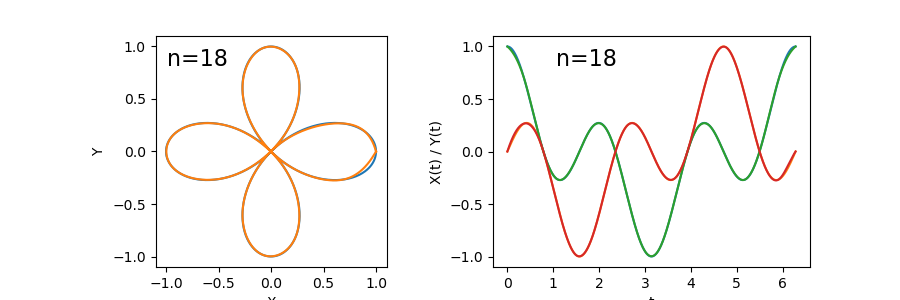

In [4]:
import matplotlib.animation as anim
%matplotlib notebook

# last n in the animation
nmax = 20

# setup
t_lin = np.linspace(a, b, 1000)
x_t = np.zeros(t_lin.size)
y_t = np.zeros(t_lin.size)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3), num='comparison')
ax1.set_title('')
ax1.set_aspect(1)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax2.set_title('')
ax2.set_xlabel("t")
ax2.set_ylabel("X(t) / Y(t)")

# tscheb init
ax1.plot(X(t_lin), Y(t_lin))
line1, = ax1.plot(X(t_lin), Y(t_lin))
#scatter1 = ax1.scatter(0, 0, s=100, c='k', marker='2', linewidths=1)
text1 = ax1.text(0.05, 0.95, 'n=i', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, fontsize=16)

# aequi init
ax2.plot(t_lin, X(t_lin))
ax2.plot(t_lin, Y(t_lin))
line2, = ax2.plot(t_lin, X(t_lin))
line3, = ax2.plot(t_lin, Y(t_lin))
#scatter2 = ax2.scatter(0, 0, s=100, c='k', marker='2', linewidths=1)
text2 = ax2.text(0.2, 0.95, 'n=i', horizontalalignment='left', verticalalignment='top', transform=ax2.transAxes, fontsize=16)

def animate(i):
    # wrap to repeat the animation after nmax frames
    i = i % nmax + 7
    
    t_i = np.linspace(a, b, i)
    x_i = X(t_i)
    y_i = Y(t_i)

    for n in range(x_t.size):
        x_t[n] = spline(t_lin[n], t_i, x_i)
        y_t[n] = spline(t_lin[n], t_i, y_i)
    
    # tscheb
    line1.set_xdata(x_t)
    line1.set_ydata(y_t)
    #scatter1.set_offsets(np.column_stack((x, f)))
    text1.set_text('n='+str(i))
    
    # aequi
    line2.set_ydata(x_t)
    line3.set_ydata(y_t)
    #scatter2.set_offsets(np.column_stack((x, f)))
    text2.set_text('n='+str(i))
    
    return line1,

ani = anim.FuncAnimation(fig, animate, blit=True, interval=1000, save_count=nmax)

# uncomment line bellow to save animation as 'comparison.mp4'
#ani.save('comparison.mp4')

In [5]:
def interpol(n):
    t_i = np.linspace(a, b, n)

    x_i = X(t_i)
    y_i = Y(t_i)

    t_lin = np.linspace(a, b, 100)
    x_t = np.zeros(t_lin.size)
    y_t = np.zeros(t_lin.size)
    for i in range(x_t.size):
        x_t[i] = spline(t_lin[i], t_i, x_i)
        y_t[i] = spline(t_lin[i], t_i, y_i)

    plt.figure()
    plt.scatter(X(t_lin), Y(t_lin), s = 1, label = "(X(t), Y(t))")
    plt.scatter(x_t, y_t, s = 1, label = "spline, n = " + str(n))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc = 'best')
    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.plot(t_lin, X(t_lin), label = "X(t)")
    plt.plot(t_lin, x_t, label = "X(t) spline, n = " + str(n))
    plt.plot(t_lin, Y(t_lin), label = "Y(t)")
    plt.plot(t_lin, y_t, label = "Y(t) spline, n = " + str(n))
    plt.xlabel("t")
    plt.ylabel("X(t) / Y(t)")
    plt.legend(loc = 'best')
    plt.tight_layout()
    plt.show()